In [35]:
import numpy as np
import pandas as pd
import seaborn as sns  # for heatmaps
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

# Pending

In [ ]:
# from scipy.io import loadmat

# link = r"D:\external_data\Experiment4"
# filename = r"\Dataset_PWR_WiFi.mat"
# directory = link + filename

# mat = loadmat(directory)

In [ ]:
# # import experimental dataset 2
# folderpath2 = "D:/external_data/Experiment3/csv_files/exp_2"  # CHANGE THIS IF THE PATH CHANGED
# df_exp2 = import_clean_data('exp2',folderpath2)

# lab

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from data.process_data import stacking
import matplotlib.pyplot as plt



def visual_spectrogram(img,title='spectrogram'):
    
    if len(img.shape) == 3:
        
        img.squeeze()
    
    img = MinMaxScaler(feature_range=(0,1)).fit_transform(img)
    
#     img = img.reshape(*img.shape[:-1],1)
    
#     img = np.concatenate((img,img,img),axis=2)
    
    plt.figure(figsize = (15,50))
    plt.imshow(img,cmap='jet')
    plt.title(title)
    plt.show()
    
    return 

In [ ]:
import torchvision.models as models
        
#visualize weights for alexnet - first conv layer
alexnet = models.alexnet(pretrained=False)

# Store all conv layer in alexnet
k = []
for m in alexnet.modules():
    if isinstance(m, nn.Conv2d):
        print(m.weight.data.shape)
        k.append(m)
    else:  
        continue


In [ ]:
def visual_single_filter(weight):
    
    img = MinMaxScaler(feature_range=(0,1)).fit_transform(weight)
    
#     img = img.reshape(*img.shape[:-1],1)
    
#     img = np.concatenate((img,img,img),axis=2)
    
#     plt.figure(figsize = (15,10))
    plt.imshow(weight,cmap='jet')
#     plt.show()
    
    return 

def visualise_filters(layer,figsize=(20,15)):
    
    weights = layer.weight.data

    if weights.shape[0] > weights.shape[1]:
        
        weights = weights.transpose(1,0)
        
    rows = weights.shape[0]
    
    cols = weights.shape[1]
    
    axes = []
    
    fig= plt.figure()

    for n in range(rows):

        for c in range(cols):
            
            axes.append(fig.add_subplot(rows, cols, n*cols+c+1))

            single_filter = weights[n,c]
        
            visual_single_filter(single_filter)
            
#     fig.tight_layout()    
    
    plt.show()     
    
    return 

visualise_filters(example)

# model factory

In [4]:
import time
from time import gmtime, strftime

In [5]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.nn import functional as F
from torchsummary import summary
import torchvision

##### extra setting

In [3]:
available_gpus = [torch.cuda.device(i) for i in range(torch.cuda.device_count())]
available_gpus

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

torch.cuda.device_count()

torch.cuda.set_device(device)

cuda:0


In [3]:
np.random.seed(1024)
torch.manual_seed(1024)
# torch.set_deterministic(True)

NameError: name 'np' is not defined

### 0. Default

In [7]:
# model 
class Model(nn.Module):
    
    def __init__(self):
        super(Model, self).__init__()
        pass
    
    def forward(self,X):
        return X

### 1. Section

In [6]:
from models import ED_module, Lambda, Classifier
from torchsummary import summary

In [7]:
class Encoder_4(nn.Module):
    """
    Encoder for spectrogram (1,65,65), 4 layer
    """
    def __init__(self,num_filters):
        super(Encoder_4, self).__init__()
        l1,l2,l3,4 = num_filters
        ### 1st ###
        self.conv1 = nn.Conv2d(1,l1,kernel_size=5,stride=2)
        self.norm1 = nn.BatchNorm2d(l1)
        self.actv1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=(2,2))
        ### 2nd ###
        self.conv2 = nn.Conv2d(l1,l2,kernel_size=3,stride=2)
        self.norm2 = nn.BatchNorm2d(l2)
        self.actv2 = nn.ReLU()
        self.pool2 = Lambda(lambda x:x) # nn.MaxPool2d(kernel_size=(2,2))
        ### 3rd ###
        self.conv3 = nn.Conv2d(l2,l3,kernel_size=2,stride=2)
        self.norm3 = Lambda(lambda x:x)
        self.actv3 = nn.Tanh()
        self.pool3 = nn.AvgPool2d(kernel_size=(2,2))
        ### 4th ###
        self.conv3 = nn.Conv2d(l2,l3,kernel_size=2,stride=2)
        self.norm3 = Lambda(lambda x:x)
        self.actv3 = nn.Tanh()
        self.pool3 = nn.AvgPool2d(kernel_size=(2,2))
        
    def forward(self,X):
        X = self.pool1(self.actv1(self.norm1(self.conv1(X))))
        X = self.pool2(self.actv2(self.norm2(self.conv2(X))))
        X = self.pool3(self.actv3(self.norm3(self.conv3(X))))
        X = torch.flatten(X, 1)
        # print(X.shape)
        return X
    
# mdl = Encoder([64,128,512]).cuda()
# summary(mdl,(1,65,65),batch_size=128)

In [8]:
class Projection_head(nn.Module):
    """
    Projection head: 
    
    head: linear/mlp
    """
    def __init__(self,dim_in,feat_dim,head='linear'):
        super(Projection_head, self).__init__()
        if head == 'linear':
            self.head = nn.Linear(dim_in, feat_dim)
        elif head == 'mlp':
            self.head = nn.Sequential(
                nn.Linear(dim_in, dim_in),
                nn.ReLU(inplace=True),
                nn.Linear(dim_in, feat_dim)
            )

    def forward(self,X):
        X = self.head(X)
        X = F.normalize(X, dim=1)
        X = X.unsqueeze(1)
        return X

### 2. calling function

In [60]:
del mdl
torch.cuda.empty_cache()

NameError: name 'mdl' is not defined

In [17]:
assert False

AssertionError: 

# Test

In [1]:
from contrastive_learning import main,switch

### 0. shortcut

### 1. Data

In [38]:
clf_val  = pd.read_csv('./record/Encoder_64-128-256-512-64-7_mode_clf_on_exp4csi_finetuning_checkpoint_300__2021_02_05_14_25_loss.csv')
norm_val = pd.read_csv('./record/Encoder_64-128-256-512-128-7_mode_normal_on_exp4csi_finetuning_checkpoint_300__2021_02_04_17_42_loss.csv')
clf_acc  = pd.read_csv('./record/Encoder_64-128-256-512-64-7_mode_clf_on_exp4csi_finetuning_checkpoint_300__2021_02_05_14_25_accuracy.csv')
norm_acc = pd.read_csv('./record/Encoder_64-128-256-512-128-7_mode_normal_on_exp4csi_finetuning_checkpoint_300__2021_02_04_17_42_accuracy.csv')
clf_pre = pd.read_csv('./record/Encoder_64-128-256-512-64-7_mode_clf_on_exp4csi_pretrain_checkpoint_500__2021_02_05_14_19_loss.csv')
clf_cmtx  = pd.read_csv('./record/Encoder_64-128-256-512-64-7_mode_clf_on_exp4csi_finetuning_checkpoint_300__2021_02_05_14_25_cmtx.csv',index_col=0)
norm_cmtx = pd.read_csv('./record/Encoder_64-128-256-512-128-7_mode_normal_on_exp4csi_finetuning_checkpoint_300__2021_02_04_17_42_cmtx.csv',index_col=0)

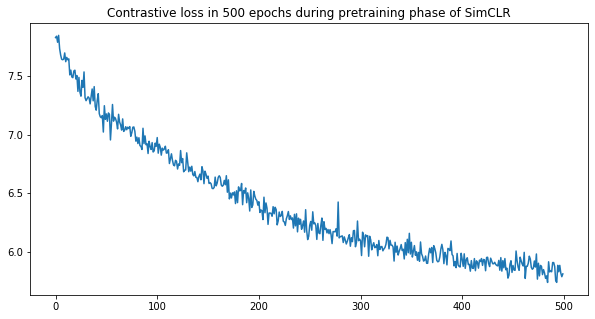

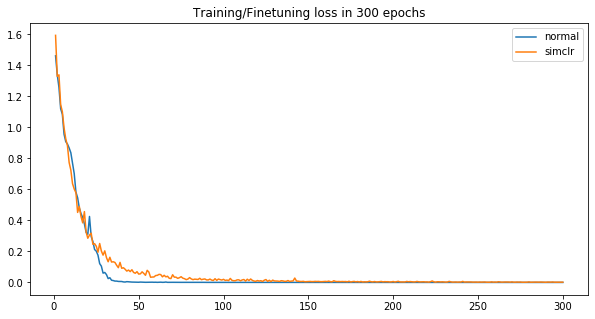

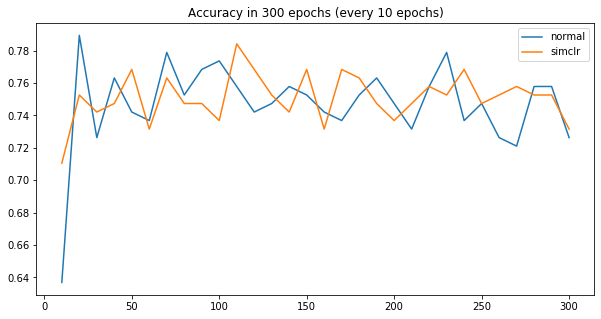

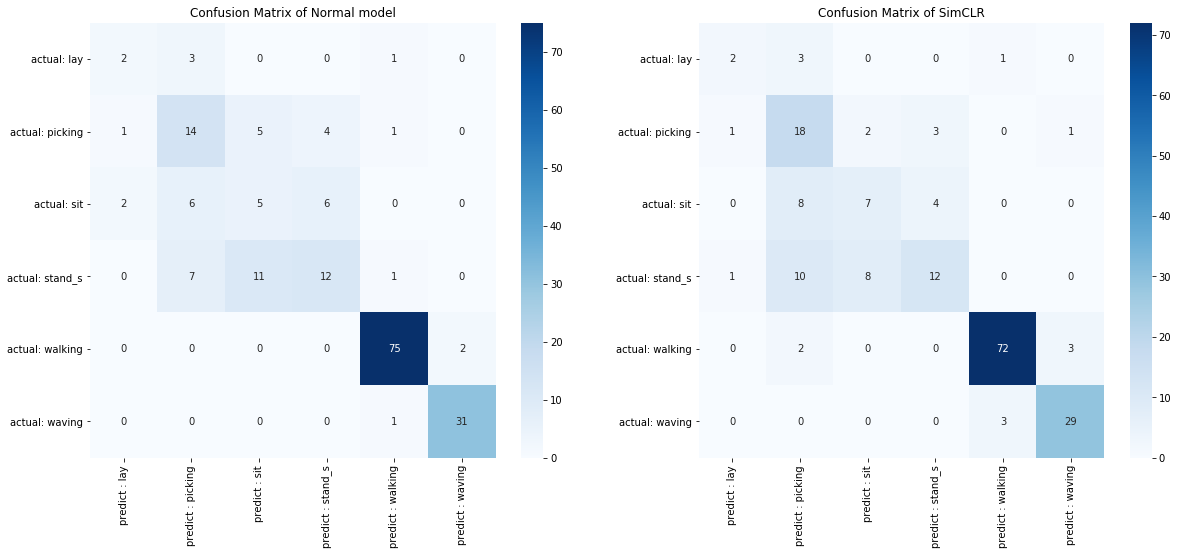